In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)

import plotly.graph_objects as go
import plotly.express as px

<ipython-input-1-28cd794dd0f4>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn-darkgrid')


In [2]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
!pip install investpy
import investpy as inv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 46.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 15.5 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481591 sha256=6b9e771d4a15117dbd4dead57496ba9bcaef69f19c26db7799e08dee1b8df8bf
  Stored in directory: /root/.cache/pip/wheels/76/6f/f7/f6e7537383423f10d7b89c1fca4ad9b6beeb3085338b920a8e
Successfully built investpy


##1. Funções para Busca e Tratamento de  Dados do Tesouro Direto

In [4]:
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

##2. Buscando dados



In [5]:
#base mestre 
titulos = busca_titulos_tesouro_direto() 
#filtro do tipo de título
titulos.loc['Tesouro Prefixado']




,,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Vencimento,Data Base,,,,,
2019-01-01,2018-01-18,6.80,6.92,940.00,939.01,938.76
2020-01-01,2018-01-18,8.00,8.12,861.01,859.15,858.88
2021-01-01,2018-01-18,8.89,9.01,778.46,775.94,775.67
2023-01-01,2018-01-18,9.59,9.71,636.54,633.11,632.88
2019-01-01,2017-10-30,7.21,7.33,922.75,921.56,921.30
2018-01-01,2017-10-30,7.18,7.30,988.78,988.60,988.32
2020-01-01,2017-10-30,8.29,8.41,842.04,840.02,839.76
2021-01-01,2017-10-30,9.02,9.14,761.51,758.87,758.61
2023-01-01,2017-10-30,9.68,9.80,621.54,618.05,617.82


In [6]:
#filtro do tipo de título
titulos.loc['Tesouro IPCA+']

,,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Vencimento,Data Base,,,,,
2019-05-15,2018-01-18,2.51,2.63,2949.60,2945.12,2944.48
2035-05-15,2018-01-18,5.20,5.32,1270.33,1245.59,1245.19
2045-05-15,2018-01-18,5.20,5.32,766.25,742.83,742.59
2024-08-15,2018-01-18,4.74,4.86,2249.92,2233.12,2232.45
2019-05-15,2017-10-30,2.76,2.88,2895.93,2890.81,2890.04
2035-05-15,2017-10-30,5.17,5.29,1251.12,1226.44,1226.00
2045-05-15,2017-10-30,5.17,5.29,756.81,733.49,733.23
2024-08-15,2017-10-30,4.68,4.80,2215.51,2198.42,2197.68
2019-05-15,2018-02-09,2.79,2.91,2951.22,2946.96,2945.25


<ipython-input-7-c0778be27b74>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  pre2026 = titulos.loc[('Tesouro Prefixado', '2024-07-01')]


<Axes: xlabel='Data Base'>

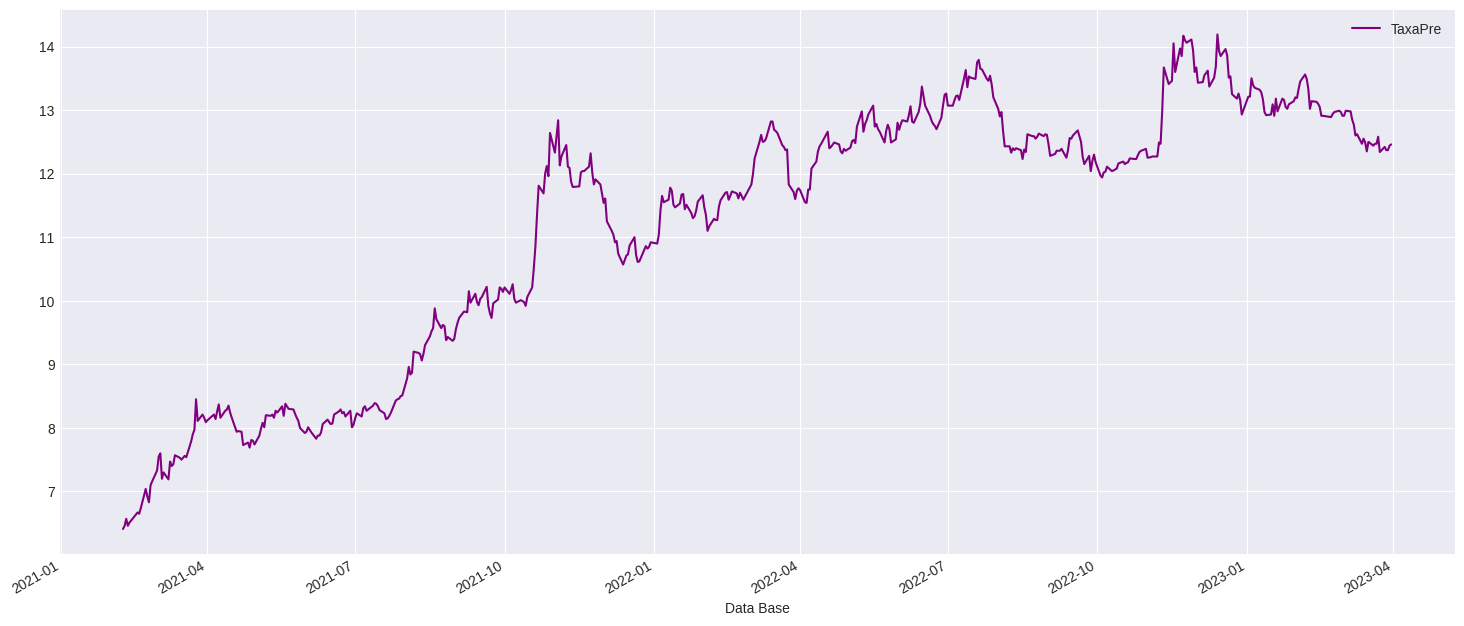

In [7]:
pre2026 = titulos.loc[('Tesouro Prefixado', '2024-07-01')]
pre2026 = pre2026.drop(columns = ['Taxa Venda Manha','PU Compra Manha','PU Venda Manha','PU Base Manha'])
pre2026.rename(columns = {'Taxa Compra Manha': 'TaxaPre'}, inplace = True)
pre2026.plot(color='purple')

<ipython-input-8-123c6b04eb08>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  ipca2026 = titulos.loc['Tesouro IPCA+','2024-08-15']


<Axes: xlabel='Data Base'>

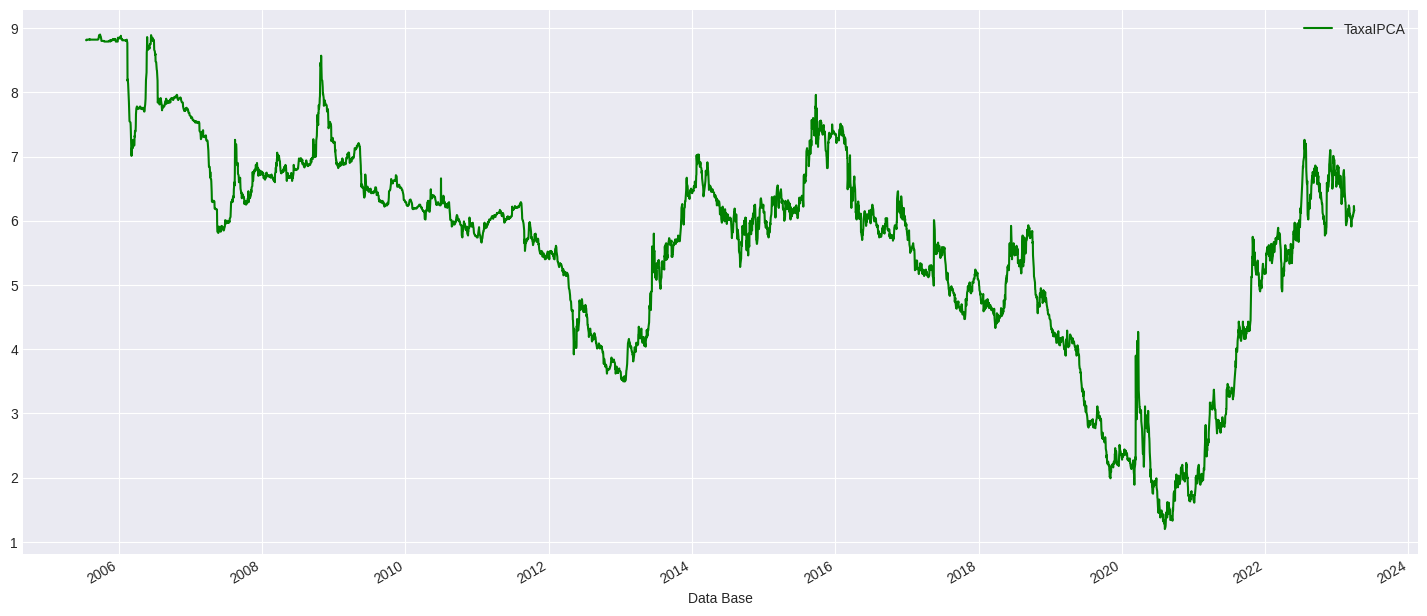

In [8]:
ipca2026 = titulos.loc['Tesouro IPCA+','2024-08-15']
ipca2026 = ipca2026.drop(columns = ['Taxa Venda Manha','PU Compra Manha','PU Venda Manha','PU Base Manha'])
ipca2026.rename(columns = {'Taxa Compra Manha': 'TaxaIPCA'}, inplace = True)
ipca2026.plot(color='green')

##3. Cálculo da Inflação Ímplicita

<ipython-input-17-214502911f6d>:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  pre = titulos.loc[('Tesouro Prefixado', f'{ano}-01-01')]
<ipython-input-17-214502911f6d>:9: PerformanceWarning: indexing past lexsort depth may impact performance.
  ipca = titulos.loc['Tesouro IPCA+',f'{ano}-08-15']


<Axes: title={'center': 'Inflação inplícita do ano 2026'}, xlabel='Data Base'>

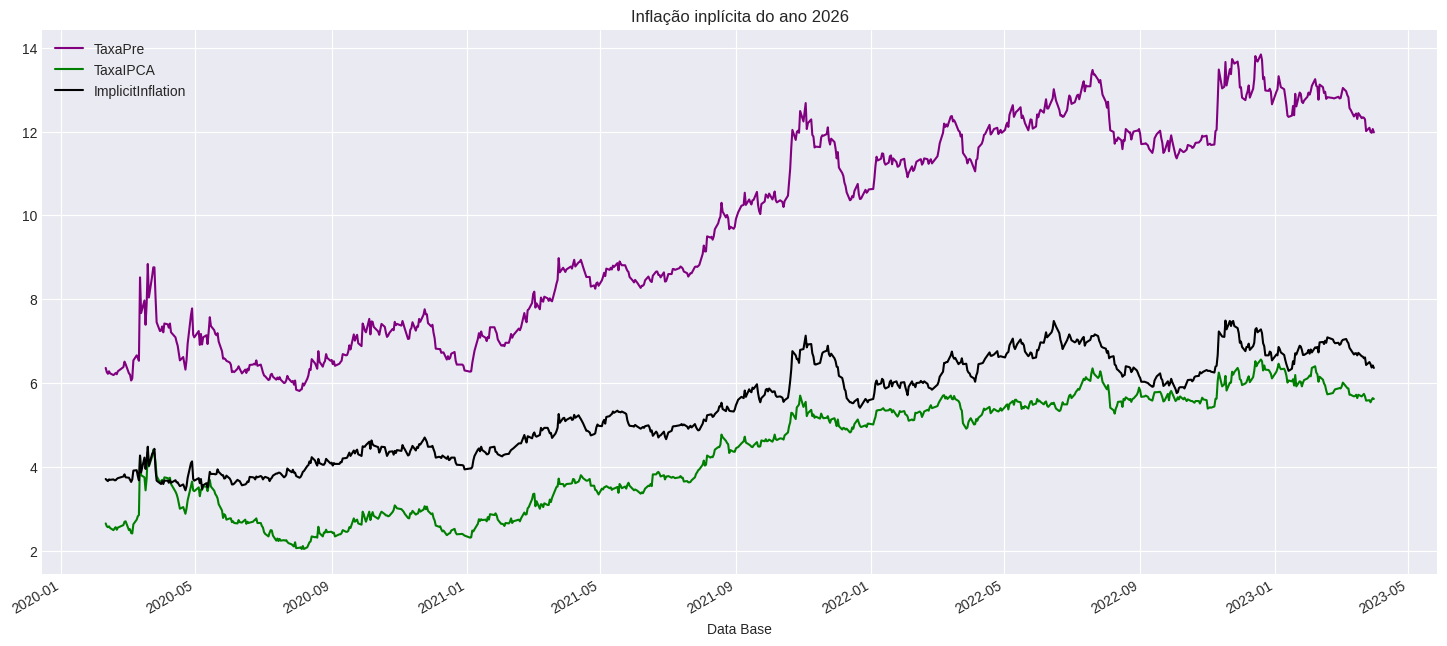

In [17]:
ano = 2026


pre = titulos.loc[('Tesouro Prefixado', f'{ano}-01-01')]
pre = pre.drop(columns = ['Taxa Venda Manha','PU Compra Manha','PU Venda Manha','PU Base Manha'])
pre.rename(columns = {'Taxa Compra Manha': 'TaxaPre'}, inplace = True)


ipca = titulos.loc['Tesouro IPCA+',f'{ano}-08-15']
ipca = ipca.drop(columns = ['Taxa Venda Manha','PU Compra Manha','PU Venda Manha','PU Base Manha'])
ipca.rename(columns = {'Taxa Compra Manha': 'TaxaIPCA'}, inplace = True)

implicit = pd.concat([pre,ipca],axis = 1)
implicit['ImplicitInflation'] = implicit['TaxaPre'] - implicit['TaxaIPCA']

implicit.dropna().plot(title = f'Inflação inplícita do ano {ano}',color=['purple','green','black'])


<Axes: xlabel='Data Base'>

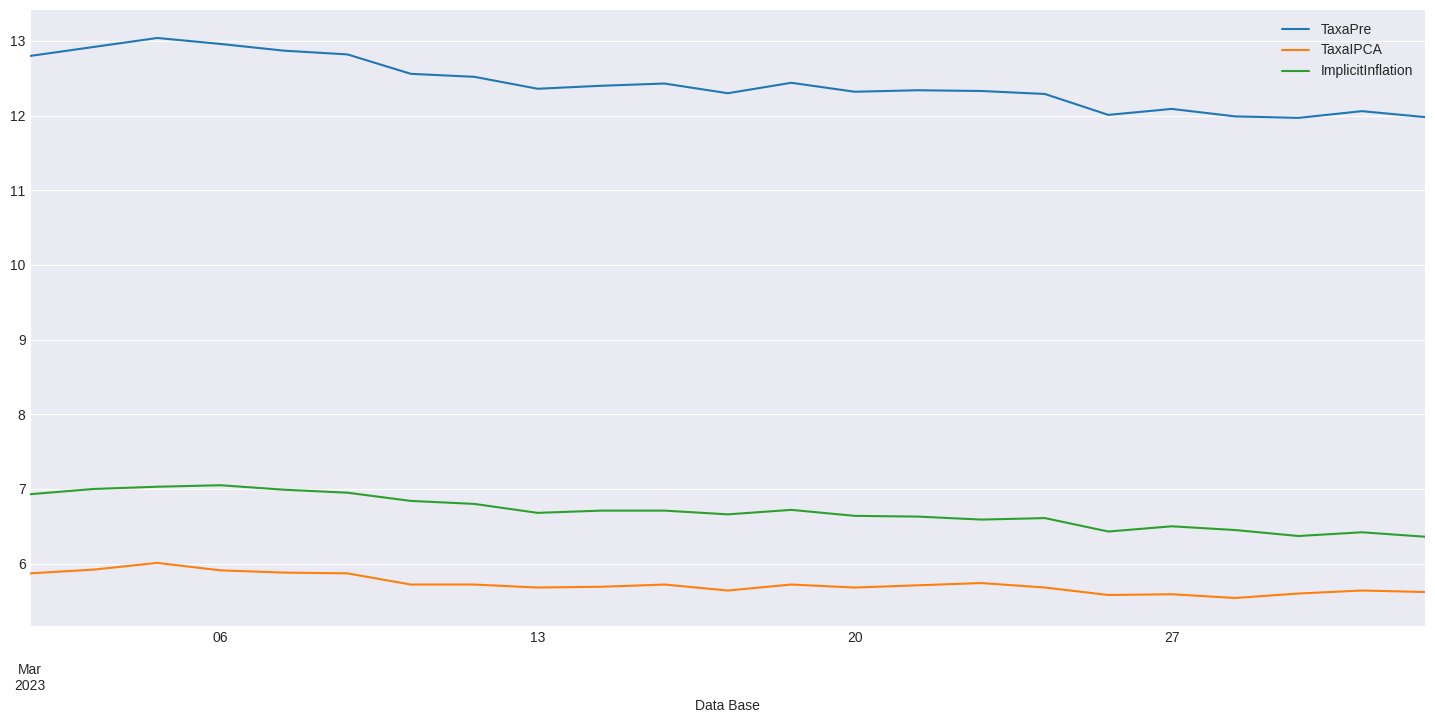

In [19]:
implicit['2023-03-01':].plot()
